# Dev separate urban rural

To do
- decide whether to have urban/rural as vars or coords (for now vars) 

In [1]:

import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import pickle as pk
from scipy import interpolate
import glob, os, re
import openpyxl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 80)
%matplotlib inline 

from population_demographics import * 

In [2]:
import time
tic = time.time()

da_pop_demographics_ssp2 = population_demographics_gridscale_global(startyear=2023,
                                                                    endyear=2023,
                                                                    ssp=2)

toc = time.time()
print(toc-tic)

opening isimip3 - ssp2
loading country masks
interpolating cohort sizes per country
calculating gridscale demographics
26.67299199104309


In [3]:
import time
tic = time.time()

da_pop_demographics_ssp2 = population_demographics_gridscale_global(startyear=2023,
                                                                    endyear=2023,
                                                                    ssp=2,
                                                                    urbanrural=True)

toc = time.time()
print(toc-tic)

opening isimip3 - ssp2
loading country masks
interpolating cohort sizes per country
calculating gridscale demographics
46.24457883834839


In [4]:
da_pop_demographics_ssp2

<xarray.Dataset>
Dimensions:           (lat: 360, lon: 720, time: 1, ages: 105)
Coordinates:
  * lat               (lat) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * lon               (lon) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * time              (time) int64 2023
  * ages              (ages) int64 0 1 2 3 4 5 6 7 ... 98 99 100 101 102 103 104
Data variables:
    urban-population  (time, lat, lon, ages) float64 nan nan nan ... nan nan nan
    rural-population  (time, lat, lon, ages) float64 nan nan nan ... nan nan nan
    total-population  (time, lat, lon, ages) float64 nan nan nan ... nan nan nan

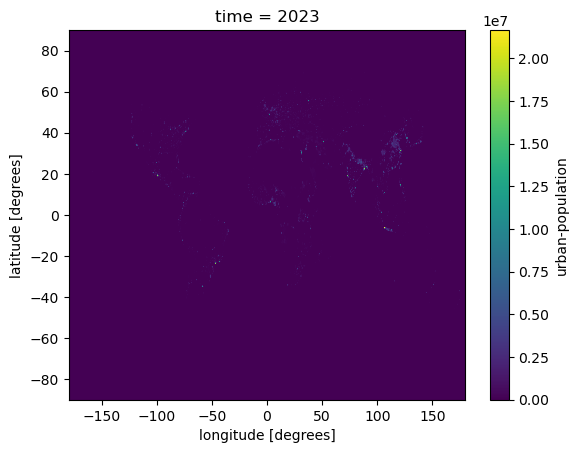

In [6]:
da_pop_demographics_ssp2['urban-population'].sum(dim='ages').plot()

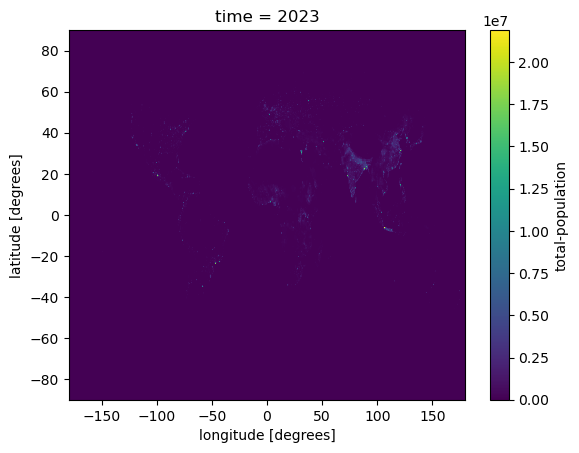

In [7]:
da_pop_demographics_ssp2['total-population'].sum(dim='ages').plot()

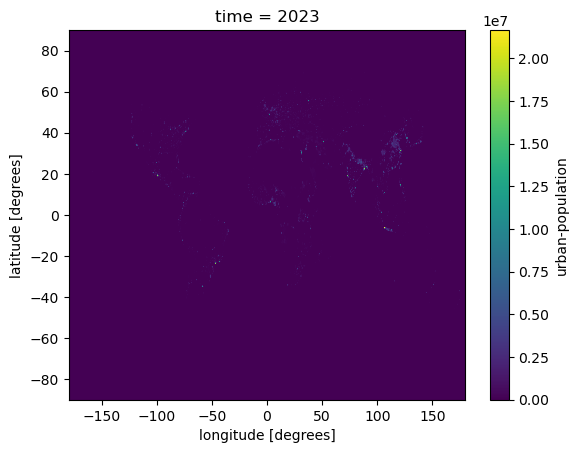

In [8]:
da_pop_demographics_ssp2['urban-population'].sum(dim='ages').plot()

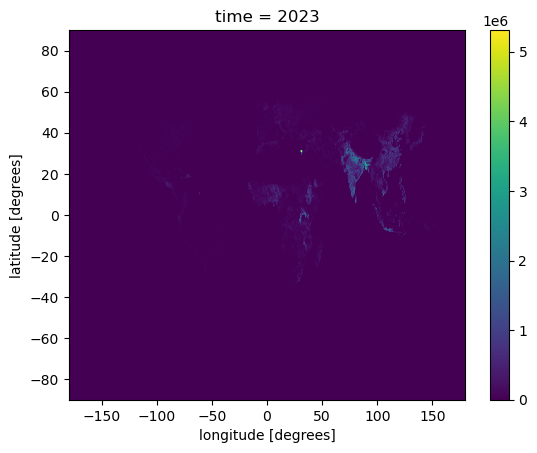

In [9]:
(da_pop_demographics_ssp2['total-population'].sum(dim='ages') - da_pop_demographics_ssp2['urban-population'].sum(dim='ages')).plot()

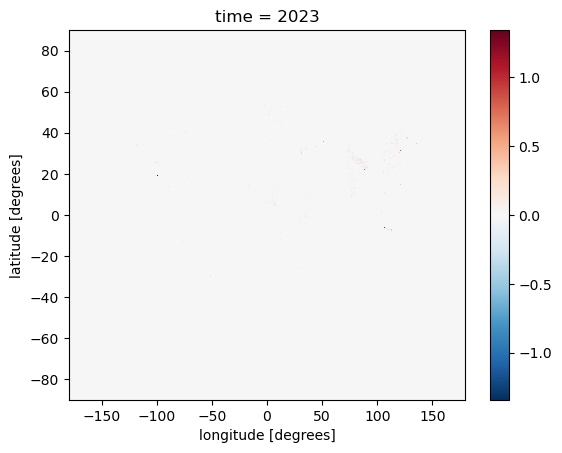

In [10]:
(da_pop_demographics_ssp2['total-population'].sum(dim='ages') - ( da_pop_demographics_ssp2['urban-population'].sum(dim='ages') +da_pop_demographics_ssp2['rural-population'].sum(dim='ages') ) ).plot()

In [11]:
(da_pop_demographics_ssp2['total-population'].sum(dim='ages') - ( da_pop_demographics_ssp2['urban-population'].sum(dim='ages') +da_pop_demographics_ssp2['rural-population'].sum(dim='ages') ) ).sum()

<xarray.DataArray ()>
array(5.37895713)

In [12]:
da_pop_demographics_ssp2['total-population'].sum(dim='ages').sum()

<xarray.DataArray 'total-population' ()>
array(8.00851946e+09)

In [13]:
da_pop_demographics_ssp2['urban-population'].sum(dim='ages').sum()

<xarray.DataArray 'urban-population' ()>
array(4.53890503e+09)

In [14]:
da_pop_demographics_ssp2['rural-population'].sum(dim='ages').sum()

<xarray.DataArray 'rural-population' ()>
array(3.46961443e+09)

In [15]:
import time
tic = time.time()

da_pop_demographics_ssp3 = population_demographics_gridscale_global(startyear=2023,
                                                                    endyear=2023,
                                                                    ssp=3,
                                                                    urbanrural=False)

toc = time.time()
print(toc-tic)

opening isimip3 - ssp3
loading country masks
interpolating cohort sizes per country
calculating gridscale demographics
46.761223554611206


In [16]:
da_pop_demographics_ssp3['total-population'].sum(dim='ages').sum()

<xarray.DataArray 'total-population' ()>
array(8.05606825e+09)

In [19]:
load_population(startyear=2023,endyear=2023,ssp=2).sum()

opening isimip3 - ssp2


<xarray.DataArray 'total-population' ()>
array(8.012771e+09, dtype=float32)

In [30]:
load_population(startyear=2023,endyear=2023,ssp=2)

opening isimip3 - ssp2


<xarray.DataArray 'total-population' (time: 1, lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time     (time) int64 2023
Attributes:
    standard_name:  total population
    long_name:      total population
    units:          1

In [20]:
load_population(startyear=2023,endyear=2023,ssp=3).sum()

opening isimip3 - ssp3


<xarray.DataArray 'total-population' ()>
array(8.060346e+09, dtype=float32)

## lost population in age calculations (eg. SSP2)

4.2 milion (0.05% of total population) lost in age demogrpahics calculations

Bias in input data: ~164 milion (data 8.013 cfr to approx world pop of 8.177 milion, https://www.worldometers.info/world-population/)

In [27]:
load_population(startyear=2023,endyear=2023,ssp=2).sum() - da_pop_demographics_ssp2['total-population'].sum(dim='ages').sum()

opening isimip3 - ssp2


<xarray.DataArray 'total-population' ()>
array(4251358.0291605)

In [26]:
(8.012771e+09 - 8.00851946e+09) / 8.012771e+09 

# 0,05 % of population ( 4 million people) lost in age demographics 

0.0005305954706555323

In [35]:
8.012771e+09 - 8177014387

# bias in input data (2% of world pop, ~146 milion)

-164243387.0

In [33]:
8.013e+09 - 8.177e+09 


-164000000.0

In [34]:
( 8.013e+09 - 8.177e+09 ) / 8.177e+09 


-0.020056255350372997

## Dev

In [2]:
dir_population='./data/gridded-pop/'

In [3]:
xr.open_dataset(os.path.join(dir_population,'ISIMIP3/ISIMIP3b/histsoc/population_histsoc_30arcmin_annual_1850_1900.nc'),
                                         )

<xarray.Dataset>
Dimensions:           (lat: 360, lon: 720, time: 51)
Coordinates:
  * lat               (lat) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * lon               (lon) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * time              (time) datetime64[ns] 1850-01-01T12:00:00 ... 1900-01-0...
Data variables:
    rural-population  (time, lat, lon) float32 ...
    total-population  (time, lat, lon) float32 ...
    urban-population  (time, lat, lon) float32 ...
Attributes:
    summary:     HYDE v3.3 population data linearly interpolated in time for ...
    references:  Klein Goldewijk et al. (2022), in preparation
    title:       ISIMIP3a population data
    contact:     "ISIMIP cross-sectoral science team" <info@isimip.org>

In [37]:


def load_population(
    dir_population='./data/gridded-pop/', 
    startyear=1850,
    endyear=2100,
    ssp=3,
    urbanrural=False,
    chunksize=100
):
    """
    Load gridded population reconstructions (histsoc) + projections (SSPs) from ISIMIP. 
    Gridded population density at 0.5 degrees, annual expressed as number of people. 
    ISIMIP2b has histsoc until 2005. ISIMIP3b has histsoc until 2021 (duplicated from ISIMIP3a), 
    then from Gao et al. 2020 (https://doi.org/10.5065/D60Z721H AND https://doi.org/10.7927/q7z9-9r69),
    scaled to match ISIMIP national population projections under different SSPs. 

    Notes: Other SSPs are available from Gao et al. but haven't been scaled to match ISIMIP - > also 5 arcmin is available too! 
    national population totals. 
    Did they fix the hist-to-ssp transition period? Dont think so. Fix this if important for analyses. 

    Input: 
        filepaths to gridded population (embedded in function for now). 
        Implemented combinations isimip3-ssp1, isimip2-ssp2, isimip3-ssp3. 
    
    Returns:
        da_population: (DataArray)  gridded population density. 
    """

    if urbanrural:
        VARs=['urban-population','rural-population','total-population']
    else:
        VARs='total-population'
    
    # Initialize list to store datasets
    datasets = []

    # Load historical data conditionally based on the start and end year
    if startyear <= 1900:
        da_pop_histsoc1 = xr.open_dataset(
            os.path.join(dir_population, 'ISIMIP3/ISIMIP3b/histsoc/population_histsoc_30arcmin_annual_1850_1900.nc')
        )[VARs]
        da_pop_histsoc1['time'] = da_pop_histsoc1['time'].dt.year
        da_pop_histsoc1 = da_pop_histsoc1.sel(time=slice(startyear, min(endyear, 1900)))
        datasets.append(da_pop_histsoc1)

    if startyear <= 2014 and endyear >= 1901:
        da_pop_histsoc2 = xr.open_dataset(
            os.path.join(dir_population, 'ISIMIP3/ISIMIP3b/histsoc/population_histsoc_30arcmin_annual_1901_2014.nc')
        )[VARs]
        da_pop_histsoc2['time'] = da_pop_histsoc2['time'].dt.year
        da_pop_histsoc2 = da_pop_histsoc2.sel(time=slice(max(startyear, 1901), min(endyear, 2014)))
        datasets.append(da_pop_histsoc2)

    # Load SSP data conditionally
    if endyear >= 2015:
        print(f'opening isimip3 - ssp{ssp}')
        da_pop_sspsoc = xr.open_dataset(
            glob.glob(os.path.join(dir_population, f'ISIMIP3/ISIMIP3b/ssp{ssp}*/population_ssp{ssp}_30arcmin_annual_2015_2100.nc'))[0],
            decode_times=False
        )[VARs]
        da_pop_sspsoc['time'] = np.array([year for year in np.arange(2015, 2101)])
        da_pop_sspsoc = da_pop_sspsoc.sel(time=slice(max(startyear, 2015), endyear))
        datasets.append(da_pop_sspsoc)

    # Concatenate datasets if there are multiple
    if len(datasets) > 1:
        da_population = xr.concat(datasets, dim='time')
    else:
        da_population = datasets[0]
    
    return da_population


In [38]:
dassp2 = load_population(ssp=2,startyear=2013, endyear=2016)

opening isimip3 - ssp2


In [39]:
dassp2 #.plot()

<xarray.DataArray 'total-population' (time: 4, lat: 360, lon: 720)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time     (time) int64 2013 2014 2015 2016
Attributes:
    units:          1
    standard_name:  total population

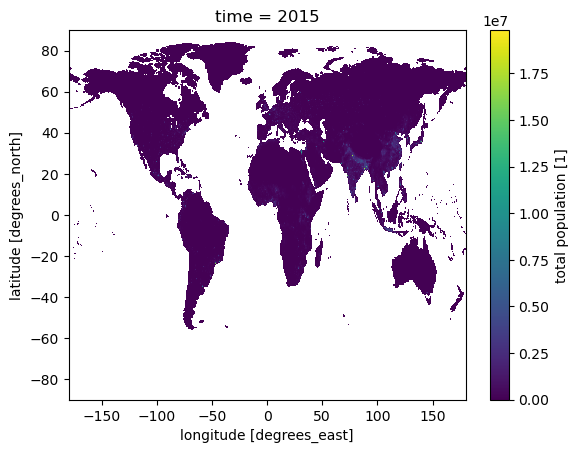

In [31]:
dassp2.sel(time=2015).plot()

In [40]:
dassp2 = load_population(ssp=2,startyear=2013, endyear=2016,urbanrural=True)

opening isimip3 - ssp2


In [41]:
dassp2

<xarray.Dataset>
Dimensions:           (time: 4, lat: 360, lon: 720)
Coordinates:
  * lat               (lat) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * lon               (lon) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * time              (time) int64 2013 2014 2015 2016
Data variables:
    urban-population  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    rural-population  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    total-population  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
Attributes:
    summary:     HYDE v3.3 population data linearly interpolated in time for ...
    references:  Klein Goldewijk et al. (2022), in preparation
    title:       ISIMIP3a population data
    contact:     "ISIMIP cross-sectoral science team" <info@isimip.org>